In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import datetime
from sklearn import linear_model
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv"
df = pd.read_csv(url, encoding="latin1")
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


<AxesSubplot:>

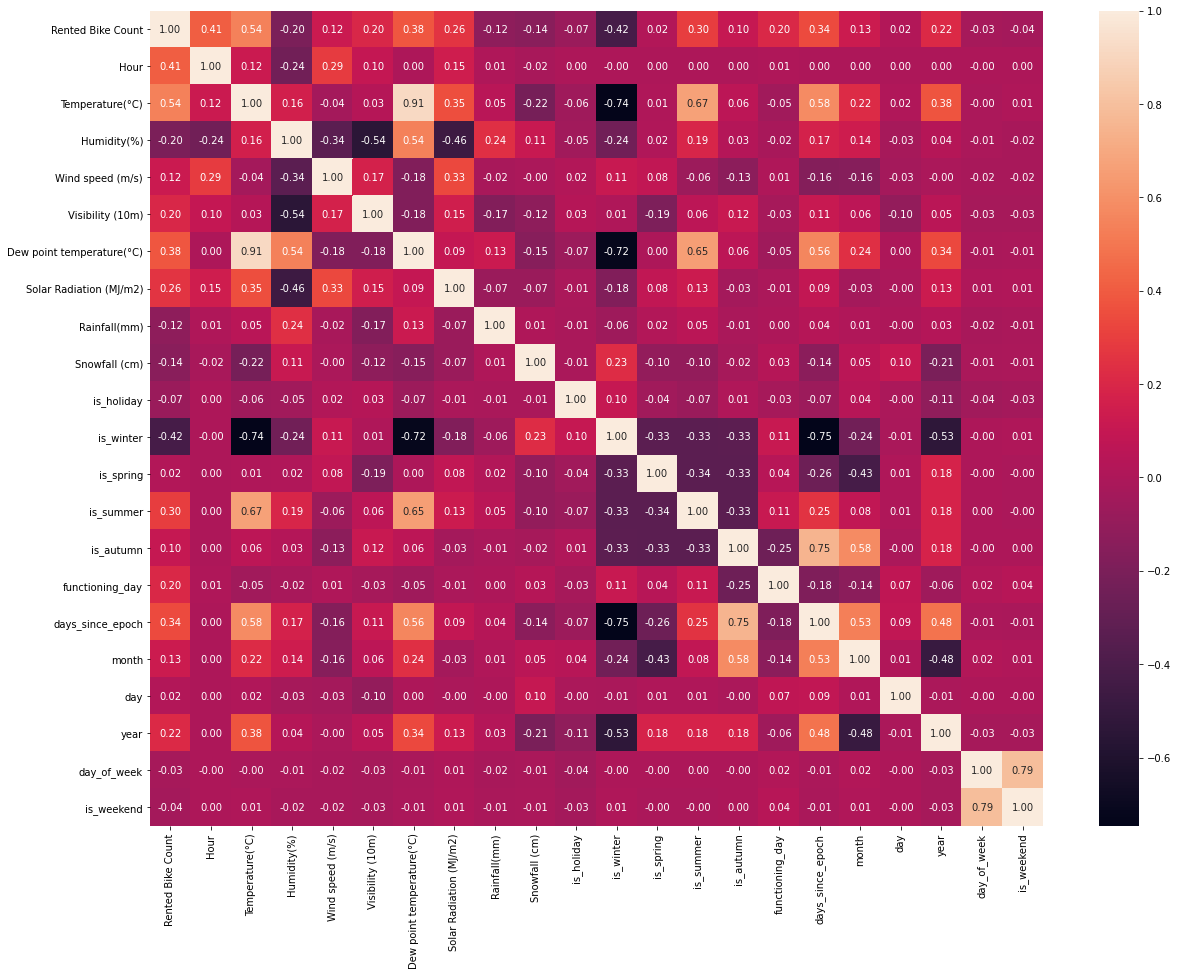

In [2]:
df["is_holiday"] = df["Holiday"].map(lambda x: x == "Holiday")
df["is_winter"] = df["Seasons"].map(lambda x: x == "Winter")
df["is_spring"] = df["Seasons"].map(lambda x: x == "Spring")
df["is_summer"] = df["Seasons"].map(lambda x: x == "Summer")
df["is_autumn"] = df["Seasons"].map(lambda x: x == "Autumn")
df["functioning_day"] = df["Functioning Day"].map(lambda x: x == "Yes")
df["date"] = df["Date"].map(lambda x: pd.to_datetime(x, dayfirst=True))
epoch = df["date"].min()
df["days_since_epoch"] = df["date"].map(lambda x: (x - epoch).days)
df["month"] = df["date"].map(lambda x: x.month)
df["day"] = df["date"].map(lambda x: x.day)
df["year"] = df["date"].map(lambda x: x.year)
df["day_of_week"] = df["date"].map(lambda x: x.weekday())
df["is_weekend"] = df["day_of_week"].map(lambda x: (x == 5) | (x==6))
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(20, 15))
sn.heatmap(df.corr(), fmt='.2f', annot=True, ax=ax)

In [10]:
pd.cut(df['Rented Bike Count'], bins=3)

0       (-3.556, 1185.333]
1       (-3.556, 1185.333]
2       (-3.556, 1185.333]
3       (-3.556, 1185.333]
4       (-3.556, 1185.333]
               ...        
8755    (-3.556, 1185.333]
8756    (-3.556, 1185.333]
8757    (-3.556, 1185.333]
8758    (-3.556, 1185.333]
8759    (-3.556, 1185.333]
Name: Rented Bike Count, Length: 8760, dtype: category
Categories (3, interval[float64]): [(-3.556, 1185.333] < (1185.333, 2370.667] < (2370.667, 3556.0]]